<a href="https://www.kaggle.com/code/tgomesjuliana/crossfit-competitions-model-building?scriptVersionId=137302641" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Model Building

## Athletes Information

In [2]:
pivot_data = pd.read_csv("../input/crossfit-competitions/pivoted_athletes_information.csv")
train_data = pivot_data[pivot_data['year'] != 2023]
train_data = train_data.drop(columns=['overallRank'])
train_data

,competitorId,gender,countryOfOriginName,regionName,affiliateId,age,overallScore,year,height_cm,weight_kg,bmi,open_rank,open_score,quarterfinals_rank,quarterfinals_score,semifinals_rank,semifinals_score
0,163097.0,0,1.0,4,19593.0,27.0,1435.0,2021,163.0,58.0,21.829952,1.0,26.0,1.0,100.0,1.0,588.0
1,591912.0,0,10.0,2,22540.0,24.0,1179.0,2021,170.0,70.0,24.221453,52.0,845.0,3.0,185.0,2.0,544.0
2,18588.0,0,11.0,2,2025.0,31.0,1099.0,2021,170.0,69.0,23.875433,118.0,1501.0,39.0,766.0,3.0,528.0
3,120480.0,0,18.0,2,372.0,35.0,1064.0,2021,162.0,59.0,22.481329,17.0,414.0,10.0,241.0,1.0,572.0
4,671666.0,0,29.0,3,3220.0,20.0,995.0,2021,171.0,64.0,21.887076,10.0,307.0,56.0,963.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,925870.0,1,8.0,2,0.0,27.0,304.0,2022,179.0,95.0,29.649512,213.0,1278.0,26.0,640.0,4.0,449.0
156,483096.0,1,9.0,2,21972.0,27.0,212.0,2022,177.0,92.0,29.365763,127.0,775.0,136.0,1702.0,4.0,430.0
157,478414.0,1,0.0,5,25616.0,25.0,194.0,2022,173.0,85.0,28.400548,52.0,378.0,15.0,482.0,2.0,443.0
158,672425.0,1,30.0,1,14416.0,29.0,125.0,2022,189.0,99.0,27.714790,560.0,2766.0,375.0,3501.0,2.0,536.0


In [3]:
X = train_data.copy()
y = X.pop('overallScore')

In [4]:
X

,competitorId,gender,countryOfOriginName,regionName,affiliateId,age,year,height_cm,weight_kg,bmi,open_rank,open_score,quarterfinals_rank,quarterfinals_score,semifinals_rank,semifinals_score
0,163097.0,0,1.0,4,19593.0,27.0,2021,163.0,58.0,21.829952,1.0,26.0,1.0,100.0,1.0,588.0
1,591912.0,0,10.0,2,22540.0,24.0,2021,170.0,70.0,24.221453,52.0,845.0,3.0,185.0,2.0,544.0
2,18588.0,0,11.0,2,2025.0,31.0,2021,170.0,69.0,23.875433,118.0,1501.0,39.0,766.0,3.0,528.0
3,120480.0,0,18.0,2,372.0,35.0,2021,162.0,59.0,22.481329,17.0,414.0,10.0,241.0,1.0,572.0
4,671666.0,0,29.0,3,3220.0,20.0,2021,171.0,64.0,21.887076,10.0,307.0,56.0,963.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,925870.0,1,8.0,2,0.0,27.0,2022,179.0,95.0,29.649512,213.0,1278.0,26.0,640.0,4.0,449.0
156,483096.0,1,9.0,2,21972.0,27.0,2022,177.0,92.0,29.365763,127.0,775.0,136.0,1702.0,4.0,430.0
157,478414.0,1,0.0,5,25616.0,25.0,2022,173.0,85.0,28.400548,52.0,378.0,15.0,482.0,2.0,443.0
158,672425.0,1,30.0,1,14416.0,29.0,2022,189.0,99.0,27.714790,560.0,2766.0,375.0,3501.0,2.0,536.0


In [5]:
y

0      1435.0
1      1179.0
2      1099.0
3      1064.0
4       995.0
        ...  
155     304.0
156     212.0
157     194.0
158     125.0
159      62.0
Name: overallScore, Length: 160, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
train_X.shape

(128, 16)

In [8]:
val_X.shape

(32, 16)

In [9]:
train_y.shape

(128,)

In [10]:
val_y.shape

(32,)

### Decision Tree w/o Train Test Split (Overfitting)

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

crossfit_model_decision_tree = DecisionTreeRegressor(random_state=1)
crossfit_model_decision_tree.fit(X, y)
predicted_athletes_scores = crossfit_model_decision_tree.predict(X)
mean_absolute_error(y, predicted_athletes_scores)

0.0

In [12]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y, predicted_athletes_scores)

0.0

### Decision Tree Regressor w/ Train Test Split

In [13]:
crossfit_model_decision_tree = DecisionTreeRegressor(random_state=1)
crossfit_model_decision_tree.fit(train_X, train_y)
predicted_scores_decision_tree = crossfit_model_decision_tree.predict(val_X)
mean_absolute_error(val_y, predicted_scores_decision_tree)

277.375

In [14]:
mean_absolute_percentage_error(val_y, predicted_scores_decision_tree)

0.7372991467601171

In [15]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in range(5, 100, 5):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  218
Max leaf nodes: 10  		 Mean Absolute Error:  235
Max leaf nodes: 15  		 Mean Absolute Error:  247
Max leaf nodes: 20  		 Mean Absolute Error:  250
Max leaf nodes: 25  		 Mean Absolute Error:  245
Max leaf nodes: 30  		 Mean Absolute Error:  244
Max leaf nodes: 35  		 Mean Absolute Error:  245
Max leaf nodes: 40  		 Mean Absolute Error:  236
Max leaf nodes: 45  		 Mean Absolute Error:  235
Max leaf nodes: 50  		 Mean Absolute Error:  238
Max leaf nodes: 55  		 Mean Absolute Error:  235
Max leaf nodes: 60  		 Mean Absolute Error:  236
Max leaf nodes: 65  		 Mean Absolute Error:  234
Max leaf nodes: 70  		 Mean Absolute Error:  233
Max leaf nodes: 75  		 Mean Absolute Error:  234
Max leaf nodes: 80  		 Mean Absolute Error:  234
Max leaf nodes: 85  		 Mean Absolute Error:  232
Max leaf nodes: 90  		 Mean Absolute Error:  233
Max leaf nodes: 95  		 Mean Absolute Error:  233


In [16]:
scores = {max_leaf_nodes: get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) for max_leaf_nodes in range(5, 100, 1)}
best_tree_size = min(scores, key=scores.get)
best_tree_size

5

### Random Forest Regressor w/ Train Test Split

In [17]:
from sklearn.ensemble import RandomForestRegressor

crossfit_model_random_forest = RandomForestRegressor(random_state=1)
crossfit_model_random_forest.fit(train_X, train_y)
predicted_scores_random_forest = crossfit_model_random_forest.predict(val_X)
mean_absolute_error(val_y, predicted_scores_random_forest)

182.47843749999998

In [18]:
mean_absolute_percentage_error(val_y, predicted_scores_random_forest)

0.5612222274063277

In [19]:
model_1 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1)
model_2 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
model_3 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1)
models = [model_1, model_2, model_3]

def score_model(model, X_t, X_v, y_t, y_v):
    model.fit(X_t, y_t)
    prediction = model.predict(X_v)
    return mean_absolute_error(y_v, prediction)

for i in range(0, len(models)):
    mae = score_model(models[i], train_X, val_X, train_y, val_y)
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 177
Model 2 MAE: 181
Model 3 MAE: 178


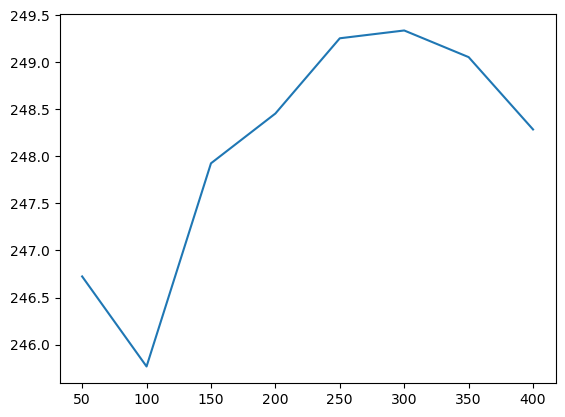

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('model', RandomForestRegressor(n_estimators, random_state=1))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range (1,9):
    results[50*i] = get_score(50*i)

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [21]:
n_estimators_best = min(results, key=results.get)
n_estimators_best

100

### XGB Regressor w/ Train Test Split

In [22]:
from xgboost import XGBRegressor

crossfit_model_xgb = XGBRegressor()
crossfit_model_xgb.fit(train_X, train_y)
predicted_scores_xgb = crossfit_model_xgb.predict(val_X)
mean_absolute_error(val_y, predicted_scores_xgb)

221.95906734466553

In [23]:
mean_absolute_percentage_error(val_y, predicted_scores_xgb)

0.5699159099748773

In [24]:
crossfit_model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
crossfit_model_xgb.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
predicted_scores_xgb = crossfit_model_xgb.predict(val_X)
mean_absolute_error(val_y, predicted_scores_xgb)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


210.9274082183838